# Explore here

In [379]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import FunctionTransformer
import numpy as np








In [380]:

df = pd.read_csv('/workspaces//pauline---Ejercicio-y-Tutorial-de-Regresion-Logistica/data/raw/bank-marketing-campaign-data.csv', sep= ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [381]:
#Queremos conocer dimensión del DF:
df.shape

(41188, 21)

In [382]:
#Tipo de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [383]:
# chequeamos :
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

No hay ningun NaN.

In [384]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [385]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())

12

In [386]:
#Hay 12, entonces buscamos cuales son : 

df[df.duplicated()==True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [387]:
#Y doble chequeo, para imprimirlas todas, para estar seguros que son exactamente iguales, la fila entera:
print(df[df.duplicated(keep=False)])

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [388]:
#Las borramos : 
df.drop(df[df.duplicated() == True].index, axis=0, inplace=True)

# Revisamos ue se hayan eleminadas, y que solo se ha quitado 12 líneas y no 24 :
print(sum(df.duplicated()))
print(df.shape)



0
(41176, 21)


In [389]:
# La meta = identificar a los clientes que tienen una mayor probabilidad de contratar un un prestamo
# Eliminamos columnas que no son relevantes o útiles o para el objectivo : 

# En ese caso : 
# Contact: Vemos que solo hay 2 datos unicos, buscamos cuales son y el %: 
print(df['contact'].value_counts())

# Telephone y cellular son sinonimos, el metodo de contacto es el mismo entonces no es relevante para el objectivo, borramos :
df.drop(['contact'], axis=1, inplace=True)

#Nos queda esas columnas: 
print(df.columns.str.strip())
print(df.shape)



contact
cellular     26135
telephone    15041
Name: count, dtype: int64
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41176, 20)


In [390]:
#Descripción básica :
df.describe().T.round(1)


,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.0,10.4,17.0,32.0,38.0,47.0,98.0
duration,41176.0,258.3,259.3,0.0,102.0,180.0,319.0,4918.0
campaign,41176.0,2.6,2.8,1.0,1.0,2.0,3.0,56.0
pdays,41176.0,962.5,186.9,0.0,999.0,999.0,999.0,999.0
previous,41176.0,0.2,0.5,0.0,0.0,0.0,0.0,7.0
emp.var.rate,41176.0,0.1,1.6,-3.4,-1.8,1.1,1.4,1.4
cons.price.idx,41176.0,93.6,0.6,92.2,93.1,93.7,94.0,94.8
cons.conf.idx,41176.0,-40.5,4.6,-50.8,-42.7,-41.8,-36.4,-26.9
euribor3m,41176.0,3.6,1.7,0.6,1.3,4.9,5.0,5.0
nr.employed,41176.0,5167.0,72.3,4963.6,5099.1,5191.0,5228.1,5228.1


Análisis de variables univariante

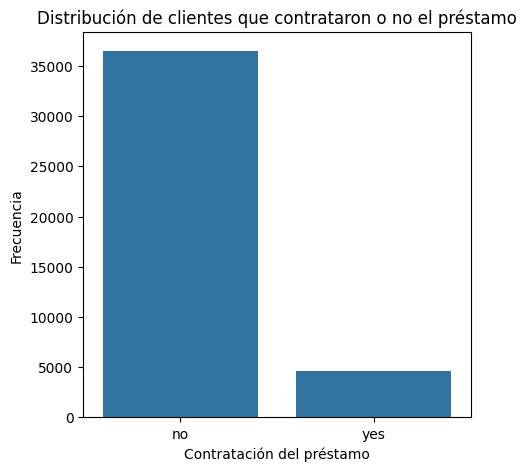

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64


In [391]:
# Visualizamos primero la distribución de nuestra target y su %:

plt.figure(figsize=(5, 5))
sns.countplot(x='y', data=df)
plt.title('Distribución de clientes que contrataron o no el préstamo')
plt.xlabel('Contratación del préstamo')
plt.ylabel('Frecuencia')

plt.show()
print(df['y'].value_counts(normalize=True) * 100)

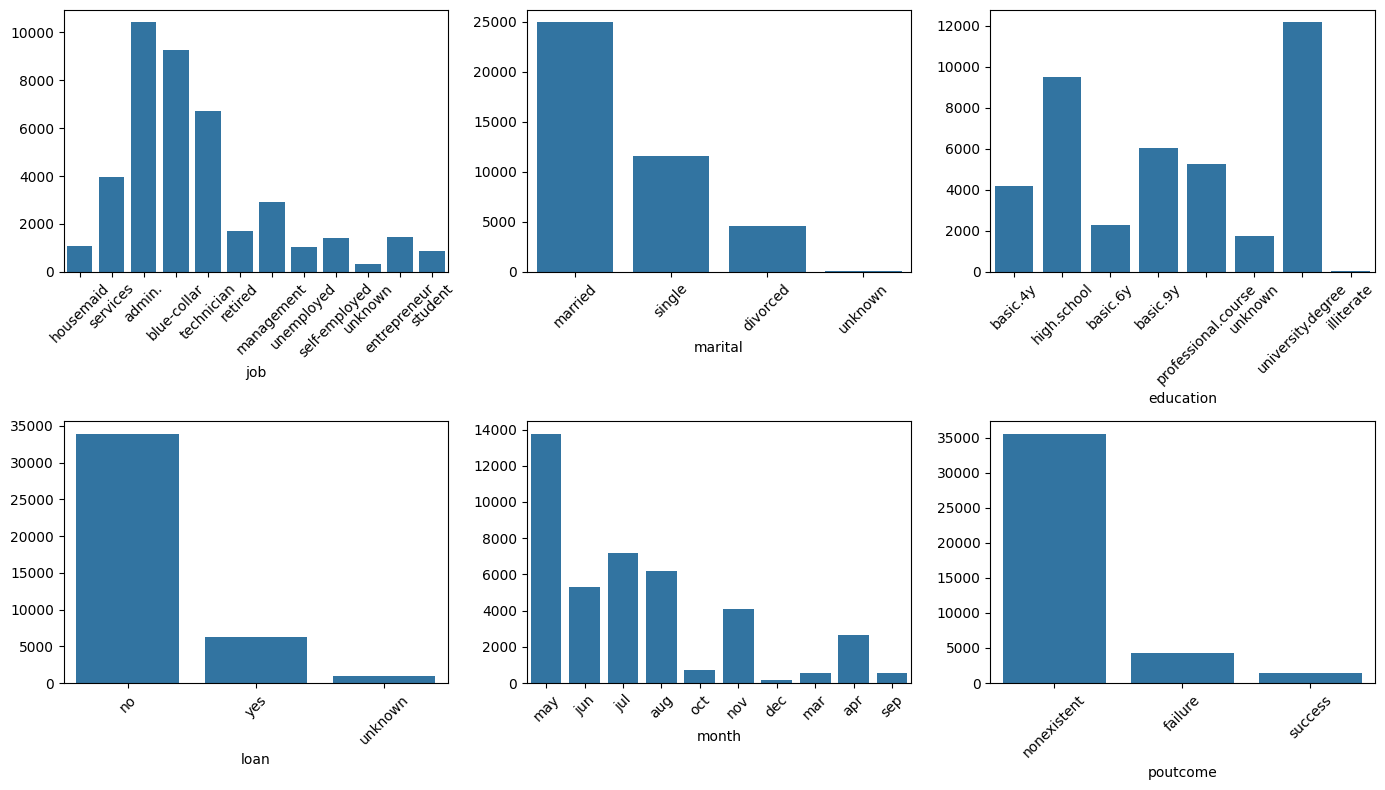

In [392]:
# Variables categóricas:
fig, axis = plt.subplots(2, 3, figsize=(14, 8))
sns.countplot(ax=axis[0, 0], data=df, x="job").set_ylabel(None)
sns.countplot(ax=axis[0, 1], data=df, x="marital").set_ylabel(None)
sns.countplot(ax=axis[0, 2], data=df, x="education").set_ylabel(None)
sns.countplot(ax=axis[1, 0], data=df, x="loan").set_ylabel(None)
sns.countplot(ax=axis[1, 1], data=df, x="month").set_ylabel(None)
sns.countplot(ax=axis[1, 2], data=df, x="poutcome").set_ylabel(None)

# Ajustar las etiquetas :
for x in axis.flatten():
    for label in x.get_xticklabels():
        label.set_rotation(45)  
        label.set_fontsize(10)  

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


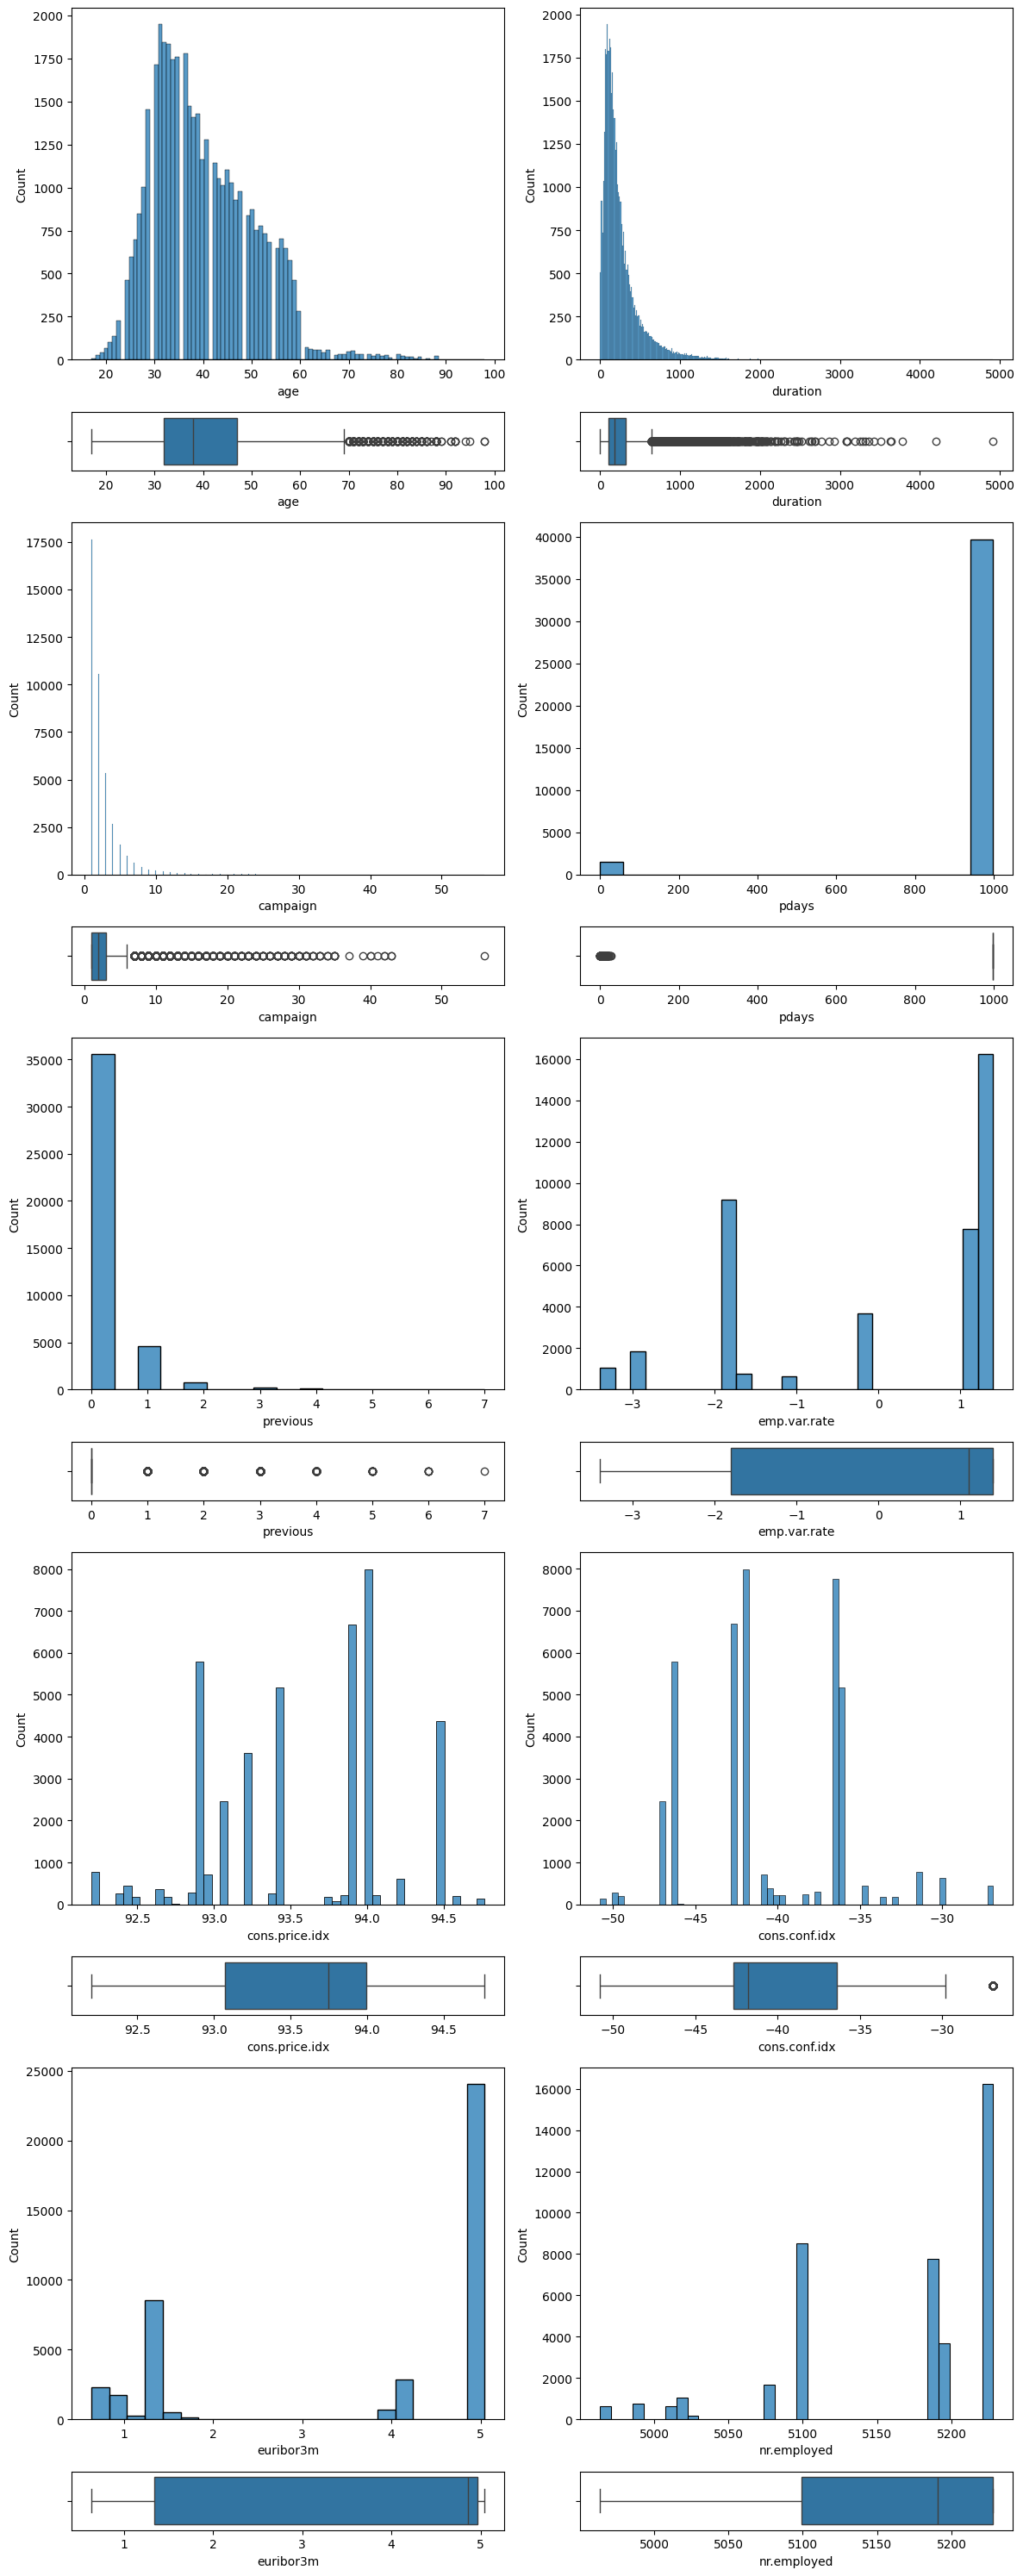

In [393]:
# Variables numéricas:

fig, axis = plt.subplots(10, 2, figsize=(12, 30), gridspec_kw={"height_ratios": [6, 1] * 5})


sns.histplot(ax=axis[0, 0], data=df, x="age")
sns.boxplot(ax=axis[1, 0], data=df, x="age")

sns.histplot(ax=axis[0, 1], data=df, x="duration")
sns.boxplot(ax=axis[1, 1], data=df, x="duration")

sns.histplot(ax=axis[2, 0], data=df, x="campaign")
sns.boxplot(ax=axis[3, 0], data=df, x="campaign")

sns.histplot(ax=axis[2, 1], data=df, x="pdays")
sns.boxplot(ax=axis[3, 1], data=df, x="pdays")


sns.histplot(ax=axis[4, 0], data=df, x="previous")
sns.boxplot(ax=axis[5, 0], data=df, x="previous")

sns.histplot(ax=axis[4, 1], data=df, x="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=df, x="emp.var.rate")

sns.histplot(ax=axis[6, 0], data=df, x="cons.price.idx")
sns.boxplot(ax=axis[7, 0], data=df, x="cons.price.idx")

sns.histplot(ax=axis[6, 1], data=df, x="cons.conf.idx")
sns.boxplot(ax=axis[7, 1], data=df, x="cons.conf.idx")

sns.histplot(ax=axis[8, 0], data=df, x="euribor3m")
sns.boxplot(ax=axis[9, 0], data=df, x="euribor3m")

sns.histplot(ax=axis[8, 1], data=df, x="nr.employed")
sns.boxplot(ax=axis[9, 1], data=df, x="nr.employed")


plt.tight_layout()


plt.show()



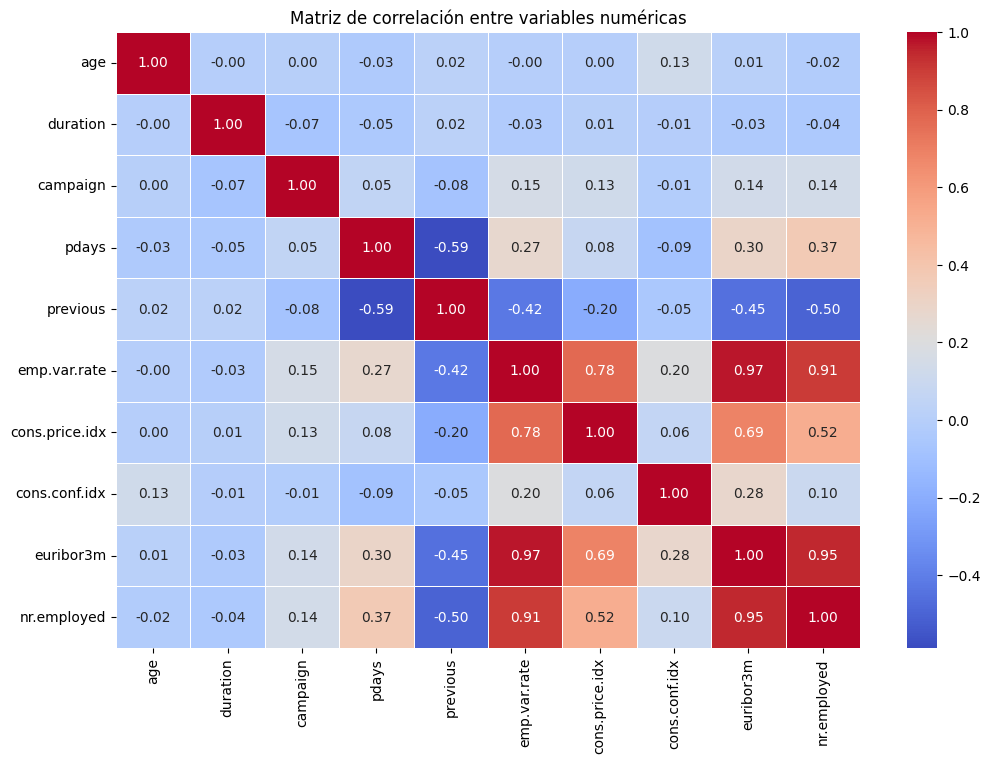

In [394]:
# Matriz de correlación de variables numéricas
num_vars = df.select_dtypes(include=['number']).columns

correlation_matrix = df[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [395]:
#Definimos X e Y para dividir el data set entre set y train
X = df.drop(['y'], axis=1) 
y = df['y'] 

# Convertir las etiquetas 'yes'/'no' en valores numéricos (1, 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección de caracteristicas :

In [396]:
#Usamos xgb para conocer la importancia de las características, vamos a usar xgb.XGBClassifier equivalente de XGBRegressor pero para clasification :

#Primero tenemos que convertir las columnas categóricas a tipo 'category' sino me salía error :"DataFrame.dtypes for data must be int, float, bool or category."
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

#Definir el model (enable_categorical=Ture --> gracias a eso no hay necesidad de convertir valores categoricas en valores numéricos) :
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True)

#Entrenar el modelo
xgb_model.fit(X_train, y_train) #Usamos datos de entrenamiento para ser lo más imparcial posible 

#Importancia :
df_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

           Feature  Importance
18     nr.employed   67.335876
9         duration    6.133805
14    emp.var.rate    4.250965
13        poutcome    3.840924
7            month    2.584357
11           pdays    1.797580
17       euribor3m    1.657135
15  cons.price.idx    1.496954
4          default    1.362713
8      day_of_week    1.241358
1              job    1.200156
3        education    1.092468
16   cons.conf.idx    1.057320
2          marital    0.873498
0              age    0.855003
10        campaign    0.853045
6             loan    0.829657
12        previous    0.800835
5          housing    0.736346


In [397]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['nr.employed', 'duration', 'emp.var.rate', 'poutcome', 'month',
       'pdays', 'euribor3m', 'cons.price.idx', 'default', 'day_of_week',
       'job', 'education', 'cons.conf.idx'], dtype=object)

In [398]:
# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

Analisamos correlación 

In [399]:
#Primero hay que convertir las variables categóricas a variables numéricas (sino me metía error "nonnexistent" y no podía aplicar .corr)
#Usamos OnehotEncoding como ejemplo de las compras pero existe una funcion :

#Separamos columnas categóricas y numéricas, cat ya existía, pero se cambió a category y no object : 
categorical_columns = X_train.select_dtypes(include=['category']).columns
numerical_columns = X_train.select_dtypes(exclude=['category']).columns

# Crear un transformador para aplicar OneHotEncoding a las variables categóricas y normalizar las numéricas (sino me metia  Input X must be non-negative para chi2)
processor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),  #Normalizar las columnas numéricas (MinMaxScaler para que todos los valores sean >=0)
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns)  #OneHotEncoding a las columnas categóricas (sparse_output=False convierte la matriz a densa = donde se guardan todos los valores, incluyendo los ceros, de manera tradicional)
    ])

#Aplicamos:
X_train_processed = processor.fit_transform(X_train)



                               nr.employed  duration  emp.var.rate     pdays  \
nr.employed                       1.000000 -0.043344      0.906441  0.376270   
duration                         -0.043344  1.000000     -0.028344 -0.047593   
emp.var.rate                      0.906441 -0.028344      1.000000  0.272156   
pdays                             0.376270 -0.047593      0.272156  1.000000   
euribor3m                         0.945018 -0.032719      0.972126  0.298181   
cons.price.idx                    0.519688  0.005242      0.774200  0.077016   
cons.conf.idx                     0.101462 -0.011479      0.198065 -0.096637   
poutcome_failure                 -0.346922 -0.013404     -0.379325  0.004770   
poutcome_nonexistent              0.492834 -0.012101      0.470643  0.493563   
poutcome_success                 -0.354389  0.045726     -0.257326 -0.949734   
month_apr                        -0.265702  0.035955     -0.312081 -0.005325   
month_aug                         0.1954

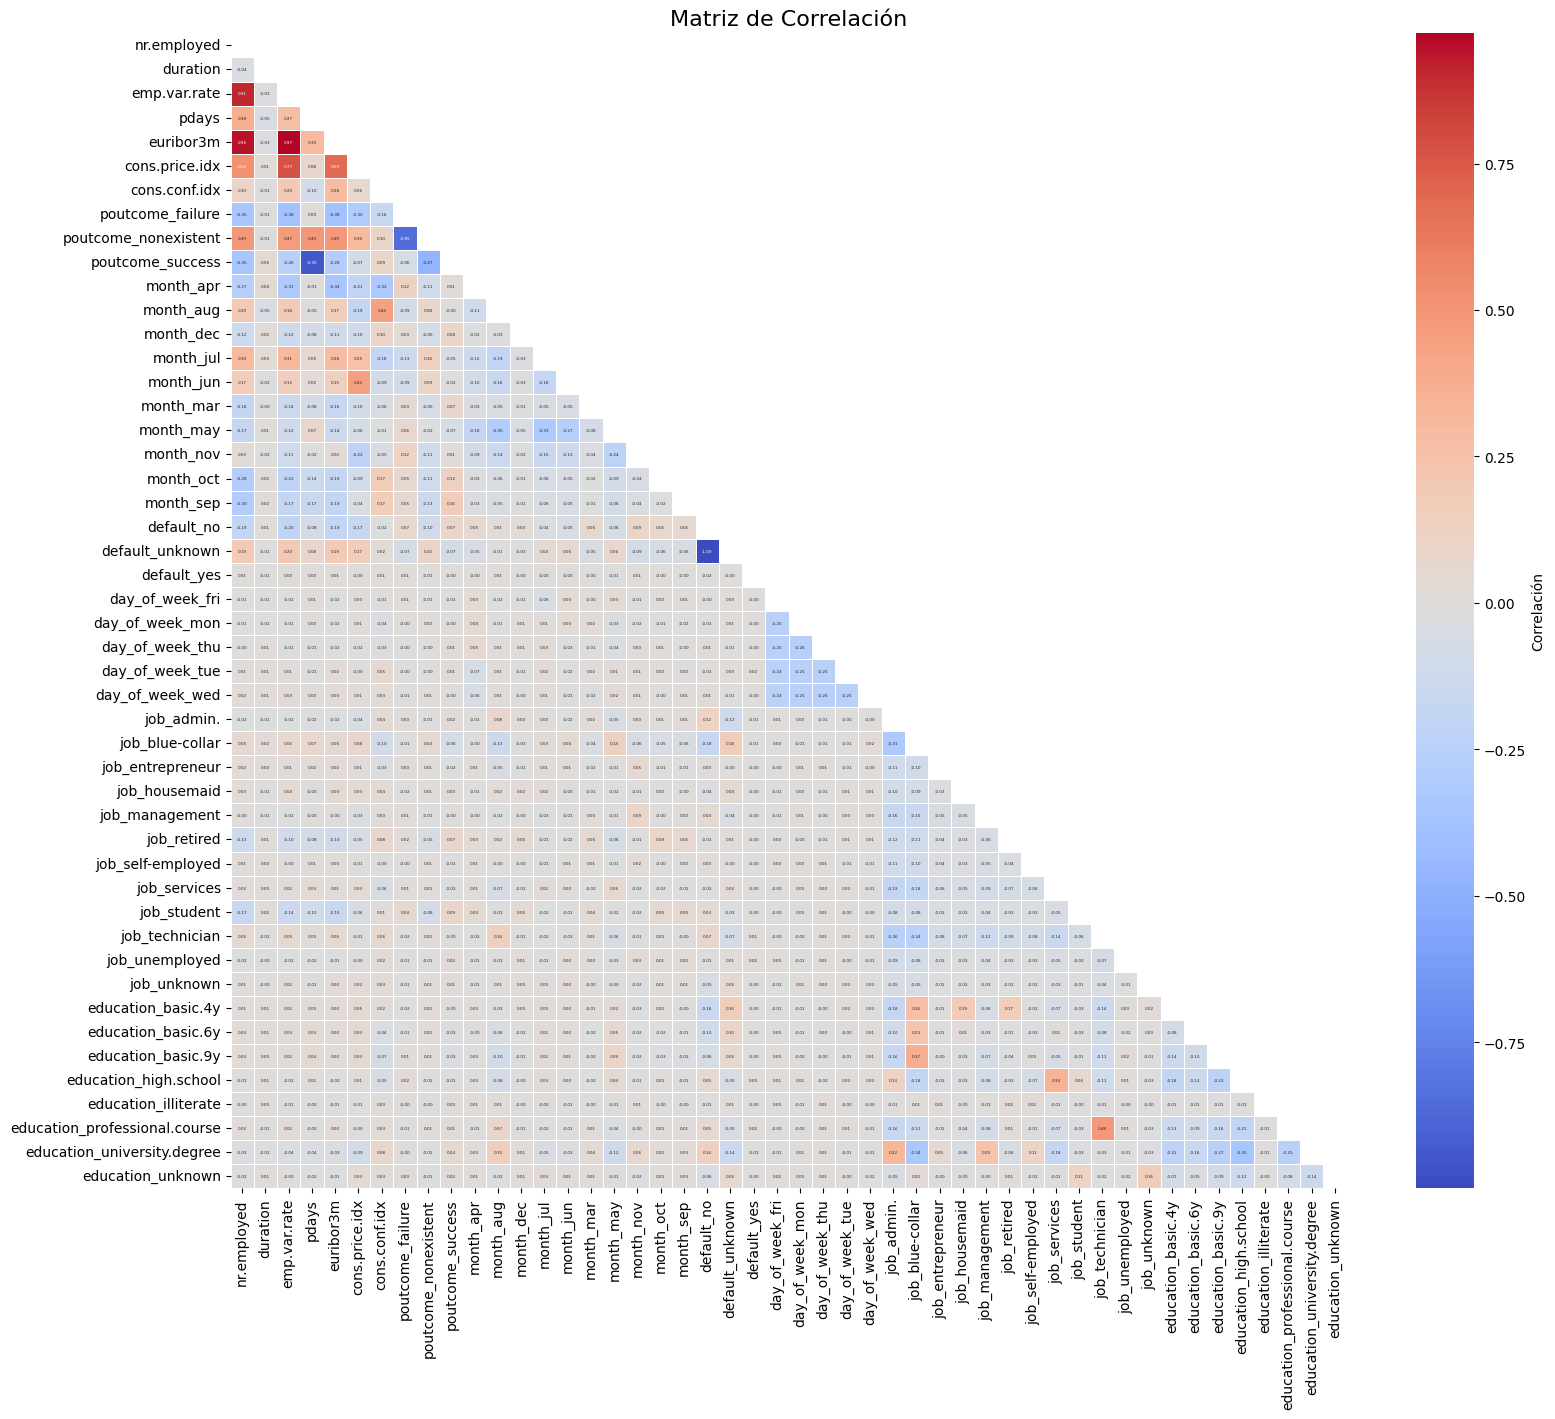

In [400]:
#Correlación : 
corr_matrix = X_train_processed_df.corr() #pandas lo convierte implícitamente en df con _df
print(corr_matrix)

# Vizualisamos :
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar_kws={'label': 'Correlación'}, annot_kws={'size': 3}) 
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


In [401]:
#VIF está diseñado más para modelos de regresión

#Entonces vamos a aplicar también chi2 de sklearn 
#(This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative integer feature values such as booleans or frequencies 
# e.g., term counts in document classification), relative to the classes.)

chi2_stats, p_values = chi2(X_train_processed, y_train)
chi2_df = pd.DataFrame({
    'Feature': X_train_processed_df.columns,
    'Chi2 Stat': chi2_stats,
    'p-value': p_values
}).sort_values(by='Chi2 Stat', ascending=False)

print(chi2_df)




                          Feature    Chi2 Stat        p-value
9                poutcome_success  3185.962967   0.000000e+00
4                       euribor3m   713.150823  4.130559e-157
15                      month_mar   703.976032  4.084071e-155
18                      month_oct   677.108406  2.842822e-149
19                      month_sep   540.194398  1.710574e-119
2                    emp.var.rate   432.723389   4.150945e-96
0                     nr.employed   406.394294   2.233595e-90
1                        duration   288.367830   1.127703e-64
33                    job_retired   270.619867   8.314048e-61
36                    job_student   261.511208   8.037344e-59
16                      month_may   251.680212   1.117232e-56
21                default_unknown   242.149822   1.336463e-54
12                      month_dec   195.582347   1.922717e-44
10                      month_apr   175.917149   3.775094e-40
8            poutcome_nonexistent   161.608445   5.037709e-37
29      

El test de Chi-cuadrado evalúa si hay una dependencia estadística significativa entre las variables independientes (X_train) y la variable dependiente y_train, la target.

Variables + importante = Las que tienen una alta estadística Chi2 y un p-value cerca 0: ***poutcome_success (de lejos, pero hay poca info (85% de la columna es "nonexistent", hubiera tenido que eleminar en EDA?)), euribor3m, y month_mar***. 
Estas variables están muy relacionadas con la target y, son relevantes para la predicción.

Variables - importantes = Las que tienen una estadística Chi2 baja y un p-value alto: ***job_management, job_self-employed, y education_professional.course***. 
No aportan mucho a la predicción.


In [402]:
#Vamos a eliminar variables que no son tan relevantes para nuestra prediccion : ie que tienen Chi2 Stat < 1 y p-value > 0.05.
filtered_chi2_df = chi2_df[(chi2_df['Chi2 Stat'] <= 1) & (chi2_df['p-value'] >= 0.05)]
print(f"Número de columnas con Chi2 Stat < 1 y p-value >= 0.05: {filtered_chi2_df.shape[0]}")

#Nombres
features_to_delete = filtered_chi2_df['Feature'].values
print(features_to_delete)



Número de columnas con Chi2 Stat < 1 y p-value >= 0.05: 9
['job_housemaid' 'day_of_week_fri' 'education_high.school' 'default_yes'
 'day_of_week_wed' 'job_management' 'education_professional.course'
 'job_unknown' 'job_self-employed']


In [403]:
#Asegurarse de que las columnas que queremos eliminar estén en X_train_processed 
encoded_columns = processor.transformers_[1][1].get_feature_names_out(categorical_columns)

columns_to_delete = []
for feature in features_to_delete:
    if feature in encoded_columns:
        columns_to_delete.append(feature)

# Eliminamos:
X_train.drop(columns=columns_to_delete, errors='ignore')


,nr.employed,duration,emp.var.rate,poutcome,month,pdays,euribor3m,cons.price.idx,default,day_of_week,job,education,cons.conf.idx
12348,5228.1,286,1.4,nonexistent,jul,999,4.959,93.918,no,fri,entrepreneur,basic.6y,-42.7
8565,5228.1,178,1.4,nonexistent,jun,999,4.864,94.465,no,wed,admin.,university.degree,-41.8
21424,5228.1,103,1.4,nonexistent,aug,999,4.963,93.444,no,tue,admin.,university.degree,-36.1
3316,5191.0,135,1.1,nonexistent,may,999,4.860,93.994,no,thu,admin.,university.degree,-36.4
33246,5099.1,418,-1.8,nonexistent,may,999,1.291,92.893,unknown,tue,blue-collar,high.school,-46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,5191.0,100,1.1,nonexistent,may,999,4.857,93.994,no,tue,blue-collar,basic.9y,-36.4
11285,5228.1,120,1.4,nonexistent,jun,999,4.961,94.465,no,thu,admin.,basic.9y,-41.8
38169,5017.5,250,-3.4,failure,oct,999,0.754,92.431,no,thu,retired,basic.4y,-26.9
860,5191.0,295,1.1,nonexistent,may,999,4.856,93.994,no,wed,management,university.degree,-36.4


Selección del algoritmo regresivo

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 21%|██▏       | 9/42 [00:03<00:14,  2.20it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
GaussianProcessRegressor model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64


 36%|███▌      | 15/42 [00:08<00:19,  1.38it/s]

KernelRidge model failed to execute
Unable to allocate 8.08 GiB for an array with shape (32940, 32940) and data type float64


 62%|██████▏   | 26/42 [00:13<00:11,  1.45it/s]